In [90]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.svm import SVC  
from xgboost import XGBClassifier  
from sklearn import metrics  
import warnings  
warnings.filterwarnings('ignore')

In [91]:
data_set=pd.read_csv('TSLA.csv')
data_set.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


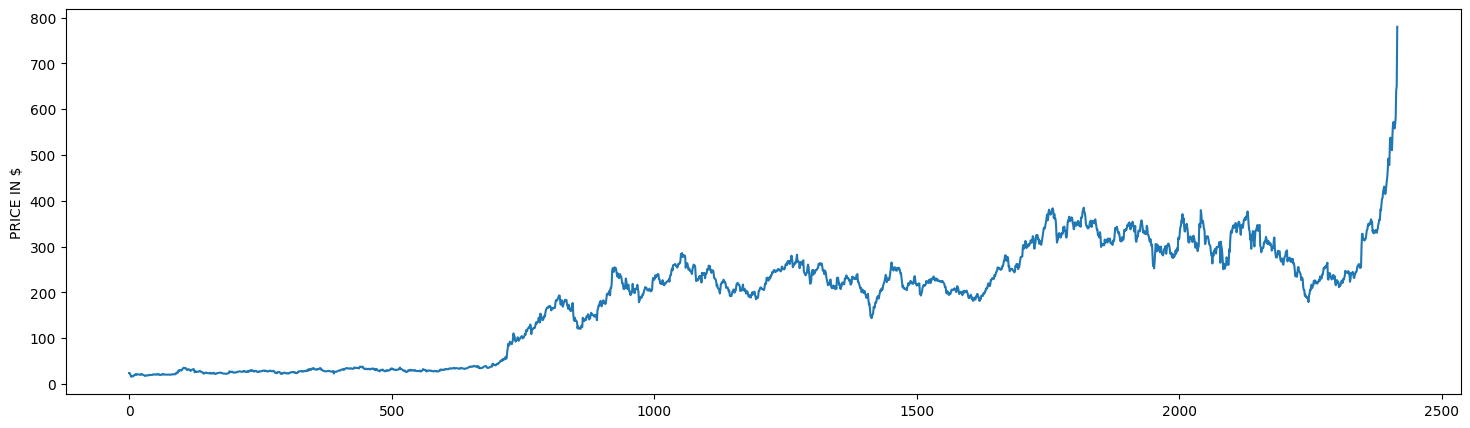

In [92]:
# DATA ANALYSIS
plt.figure(figsize=(18,5))
plt.plot(data_set['Close']) 
plt.ylabel('PRICE IN $')
plt.show()

In [93]:
# splitting date month year as they are also important
splitted=data_set['Date'].str.split('-',expand=True)
data_set['day']=splitted[2].astype('int')
data_set['month']=splitted[1].astype('int')
data_set['year']=splitted[0].astype('int')

In [94]:
data_set['quarter'] = np.where(data_set['month'] % 3 == 0, 1, 0)

In [95]:
data_set

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,quarter
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,6,7,2010,0
...,...,...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,28,1,2020,0
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,29,1,2020,0
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,30,1,2020,0
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,31,1,2020,0


In [96]:
# adding more columns
data_set['open-close']=data_set['Open']-data_set['Close']
data_set['low-high']=data_set['Low']-data_set['High']
data_set['target']=np.where(data_set['Close'].shift(-1)>data_set['Close'],1,0)

In [97]:
data_set

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,quarter,open-close,low-high,target
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,28,1,2020,0,1.589966,-18.729981,1
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,29,1,2020,0,-5.299988,-22.369995,1
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,30,1,2020,0,-8.390015,-32.880005,1
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,31,1,2020,0,-10.570007,-20.479980,1


In [98]:
data_set.drop('Date',inplace=True,axis=1)
data_set

,Open,High,Low,Close,Adj Close,Volume,day,month,year,quarter,open-close,low-high,target
0,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,28,1,2020,0,1.589966,-18.729981,1
2412,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,29,1,2020,0,-5.299988,-22.369995,1
2413,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,30,1,2020,0,-8.390015,-32.880005,1
2414,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,31,1,2020,0,-10.570007,-20.479980,1


In [99]:
data_set.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'day', 'month', 'year' ,'Close'], inplace=True, axis=1)
data_set

,quarter,open-close,low-high,target
0,1,-4.889999,-7.459999,0
1,1,1.960001,-7.120001,0
2,0,3.040001,-5.650000,0
3,0,3.799999,-4.390001,0
4,0,3.889999,-4.170000,0
...,...,...,...,...
2411,0,1.589966,-18.729981,1
2412,0,-5.299988,-22.369995,1
2413,0,-8.390015,-32.880005,1
2414,0,-10.570007,-20.479980,1


In [100]:
x=data_set.iloc[:,:-1]
y=data_set.iloc[:,-1]
scaler= StandardScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [101]:
# training and testing accuracy
models=[LogisticRegression() , SVC(kernel='poly',probability=True) ,XGBClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

for i in range(5):
    models[i].fit(x_train,y_train)
    y_pred = models[i].predict(x_test)
    confusion_matrix_result = metrics.confusion_matrix(y_test, y_pred)
    print(f'{models[i]} : ')  
    print('The Training Accuracy of the model is: ', metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:,1])*100,"%")  
    print('The Validation Accuracy of the model is: ', metrics.roc_auc_score(y_test, models[i].predict_proba(x_test)[:,1])*100,"%") 
    print(confusion_matrix_result)
    print()  

LogisticRegression() : 
The Training Accuracy of the model is:  51.530504991569885 %
The Validation Accuracy of the model is:  52.801256766217584 %
[[ 46 197]
 [ 32 209]]

SVC(kernel='poly', probability=True) : 
The Training Accuracy of the model is:  51.44266451587992 %
The Validation Accuracy of the model is:  52.065297201304574 %
[[  3 240]
 [  5 236]]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
            